In [70]:
import pandas as pd

In [71]:
data = dict(
            names = ["aliu","sanusi", "halima", "sanusi", "halima", "halima", "sanusi", "sanusi"],
            scores = [23, 19, 55, 98, 50, 80, 45, 19],
            ages = [30, 30, 28, 27, 20, 34, 60, 88]
            )

In [72]:
# creating pandas dataframe
df = pd.DataFrame(data)
df

,names,scores,ages
0,aliu,23,30
1,sanusi,19,30
2,halima,55,28
3,sanusi,98,27
4,halima,50,20
5,halima,80,34
6,sanusi,45,60
7,sanusi,19,88


In [73]:
type(df)

pandas.core.frame.DataFrame

In [74]:
# series is a slice of a dataframe
names = df.names
names

0      aliu
1    sanusi
2    halima
3    sanusi
4    halima
5    halima
6    sanusi
7    sanusi
Name: names, dtype: object

In [75]:
type(names)

pandas.core.series.Series

In [76]:
# PANDAS .ILOC attribute ALLOWS ONE TO FETCH ACROSS THE ROW INDICES
aliu = df.iloc[1]
aliu

names     sanusi
scores        19
ages          30
Name: 1, dtype: object

In [77]:
# # pandas dataframe index can be switched to something else, maybe a column of your data.
# df.index = df.names

In [78]:
df

,names,scores,ages
0,aliu,23,30
1,sanusi,19,30
2,halima,55,28
3,sanusi,98,27
4,halima,50,20
5,halima,80,34
6,sanusi,45,60
7,sanusi,19,88


In [79]:
# df.loc["aliu"]

In [80]:
# quick technical detail about data frame
# take note that pandas takes strings as objects

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8 entries, 0 to 7
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   names   8 non-null      object
 1   scores  8 non-null      int64 
 2   ages    8 non-null      int64 
dtypes: int64(2), object(1)
memory usage: 320.0+ bytes


In [81]:
# .describe method gives statistical information on your dataframe
df.describe() # describes only the numeric columns

,scores,ages
count,8.00000,8.000000
mean,48.62500,39.625000
std,29.00708,22.840675
min,19.00000,20.000000
25%,22.00000,27.750000
50%,47.50000,30.000000
75%,61.25000,40.500000
max,98.00000,88.000000


In [82]:
df.describe(include = ["O"]) #include 'O' same as include strings to describe.

,names
count,8
unique,3
top,sanusi
freq,4


In [84]:
df.names == "halima" # you can use a logical operator filter a dataframe or series this will return a boolean mask

0    False
1    False
2     True
3    False
4     True
5     True
6    False
7    False
Name: names, dtype: bool

In [89]:
halima_filter_over_50 = (df.names == "halima") & (df.scores > 50)
df[halima_filter_over_50]

,names,scores,ages
2,halima,55,28
5,halima,80,34


LOAD DATA FROM CSV USING PANDAS

In [90]:
covid = pd.read_csv("time_series_covid19_confirmed_global.csv")

In [92]:
covid[covid["Country/Region"] == "Afghanistan"]

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,2/3/21,2/4/21,2/5/21,2/6/21,2/7/21,2/8/21,2/9/21,2/10/21,2/11/21,2/12/21
0,NaN,Afghanistan,33.93911,67.709953,0,0,0,0,0,0,...,55174,55231,55265,55330,55335,55359,55384,55402,55420,55445


In [128]:
afghan = covid[covid["Country/Region"] == "Afghanistan"]
last_10_days_values = afghan.iloc[0][-10:]

In [129]:
# last_10_days = last_10_days[-10:]
# last_10_days
labels=afghan.columns
last_10_label = labels[-10:]
last_10_label

Index(['2/3/21', '2/4/21', '2/5/21', '2/6/21', '2/7/21', '2/8/21', '2/9/21',
       '2/10/21', '2/11/21', '2/12/21'],
      dtype='object')

In [130]:
from matplotlib import pyplot as plt

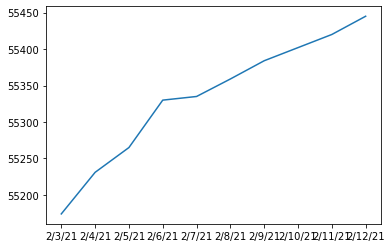

In [131]:
plt.plot(last_10_label, last_10_days_values)

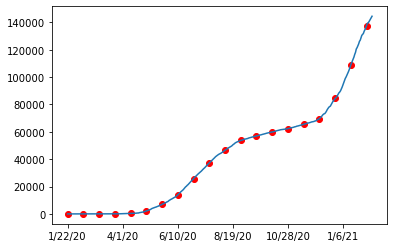

In [150]:
nig = covid[covid["Country/Region"] == "Nigeria"]
values = nig.iloc[0][4:]
labels=nig.columns
last_label = labels[4:]
last_label

plt.plot(last_label, last_days)
plt.scatter(last_label[::20], values[::20], color = "red")
plt.xticks(last_label[::70])
plt.savefig("eunice.pdf")

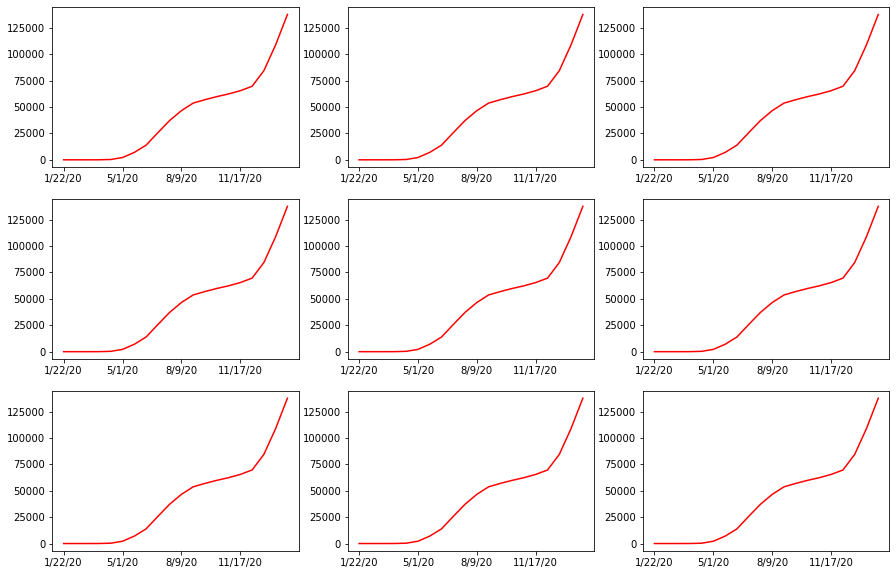

In [172]:
fig, axs = plt.subplots(3, 3, figsize=(15,10))

for row in range(3):
    for column in range(3):
        axs[row, column].plot(last_label[::20], values[::20], color = "red")
        axs[row, column].set_xticks(last_label[::100])
plt.show()

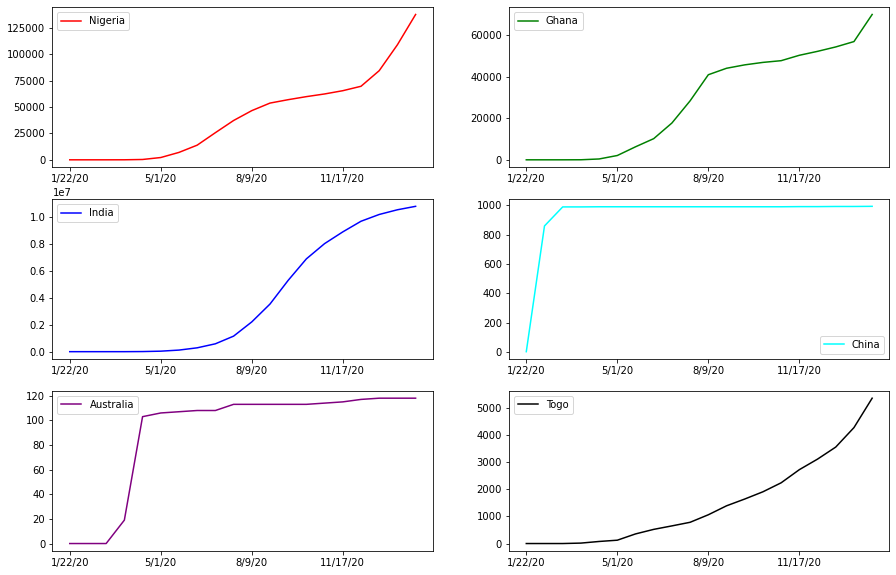

In [179]:
fig, axs = plt.subplots(3, 2, figsize=(15,10))
countries = ["Nigeria", "Ghana", "India", "China", "Australia", "Togo"]
colors = ["r","g", "b", "cyan", "purple", "k"]
n = 0

for row in range(3):
    for column in range(2):
        
        target_country = countries[n]
        
        country = covid[covid["Country/Region"] == target_country]
        values = country.iloc[0][4:]
        labels=country.columns
        last_label = labels[4:]

        axs[row, column].plot(last_label[::20], values[::20], color = colors[n], label = target_country)
        axs[row, column].set_xticks(last_label[::100])
        axs[row, column].legend()
        
        n += 1

plt.show()